In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [17]:
f = open(r'birch3.txt')
text = f.readlines()
data = np.array((len(text), 2))
print(data)

data = np.array(([line.split() for line in text]), dtype=np.float64)
print(data)

[100000      2]
[[118879. 887164.]
 [118415. 867117.]
 [118274. 902572.]
 ...
 [916195. 911865.]
 [916203. 391940.]
 [916252. 485878.]]


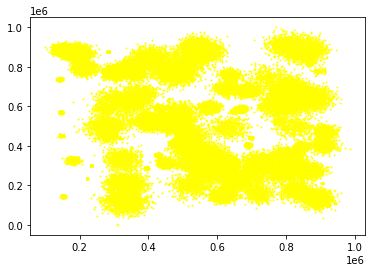

In [18]:
plt.scatter(data[:,0], data[:,1], c = "yellow", s=1);

### 1 random choosing clusters
### 2 assign labels based on mean() of dots
### 3 find new centers based on mean() of dots
### 4 check on convergence

5


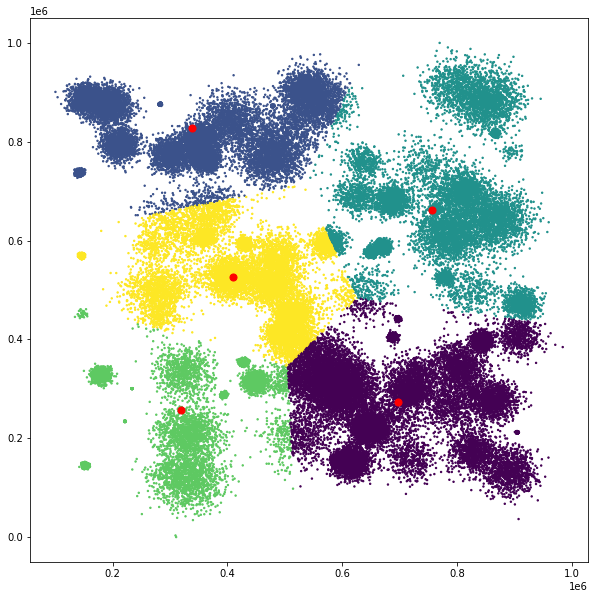

In [21]:
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, rseed=5):
    # 1. 
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    
    while True:
        # 2
        labels = pairwise_distances_argmin(X, centers)
        
        # 3. 
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])
        
        # 4
        if np.all(centers == new_centers):
            break
        centers = new_centers
    
    return centers, labels

variable = int(input())
centers, labels = find_clusters(data, variable)

plt.figure(figsize=(10,10))
plt.scatter(data[:, 0], data[:, 1], c=labels, s=2, cmap='viridis');
plt.scatter(centers[:,0], centers[:,1], c='red', s=50);

In [12]:
for i, center in enumerate(centers):
    print(f'Center #{i+1}: x:{center[0]} | y:{center[1]}')

Center #1: x:328990.08663405397 | y:53982.718478775445
Center #2: x:899821.3424350726 | y:39551.42354062426
Center #3: x:143498.43445205822 | y:47938.530735757515
Center #4: x:514538.4389841524 | y:42532.581612758084
Center #5: x:704836.9870551779 | y:34974.843162734905
